In [123]:
#import das bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
from fpdf import FPDF

planilha = pd.read_csv('CADASTRO_IES_2020.CSV', encoding='ISO-8859-1', sep=';', low_memory=False)
print(planilha)

      NU_ANO_CENSO NO_REGIAO_IES  CO_REGIAO_IES         NO_UF_IES SG_UF_IES  \
0             2020         Norte              1          Rondônia        RO   
1             2020         Norte              1          Rondônia        RO   
2             2020         Norte              1          Rondônia        RO   
3             2020         Norte              1          Rondônia        RO   
4             2020         Norte              1          Rondônia        RO   
...            ...           ...            ...               ...       ...   
2452          2020  Centro-Oeste              5  Distrito Federal        DF   
2453          2020  Centro-Oeste              5  Distrito Federal        DF   
2454          2020  Centro-Oeste              5  Distrito Federal        DF   
2455          2020  Centro-Oeste              5  Distrito Federal        DF   
2456          2020  Centro-Oeste              5  Distrito Federal        DF   

      CO_UF_IES NO_MUNICIPIO_IES  CO_MUNICIPIO_IES 

Analises e gráficos de etnia dos docentes em atividade

In [124]:
#excluindo e analisando as quantidade de valores nulos após do dropna
planilha.dropna(inplace=True)
valores_nulos = planilha.isnull().sum()
print("Valore nulos:", valores_nulos)

Valore nulos: NU_ANO_CENSO              0
NO_REGIAO_IES             0
CO_REGIAO_IES             0
NO_UF_IES                 0
SG_UF_IES                 0
                         ..
DOC_EX_INDÍGENA           0
DOC_EX_COR_ND             0
DOC_EX_BRA                0
DOC_EX_EST                0
DOC_EX_COM_DEFICIÊNCIA    0
Length: 81, dtype: int64


In [125]:
#informações
print(planilha.info())

<class 'pandas.core.frame.DataFrame'>
Index: 2002 entries, 0 to 2456
Data columns (total 81 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   NU_ANO_CENSO                    2002 non-null   int64  
 1   NO_REGIAO_IES                   2002 non-null   object 
 2   CO_REGIAO_IES                   2002 non-null   int64  
 3   NO_UF_IES                       2002 non-null   object 
 4   SG_UF_IES                       2002 non-null   object 
 5   CO_UF_IES                       2002 non-null   int64  
 6   NO_MUNICIPIO_IES                2002 non-null   object 
 7   CO_MUNICIPIO_IES                2002 non-null   int64  
 8   IN_CAPITAL_IES                  2002 non-null   int64  
 9   NO_MESORREGIAO_IES              2002 non-null   object 
 10  CO_MESORREGIAO_IES              2002 non-null   int64  
 11  NO_MICRORREGIAO_IES             2002 non-null   object 
 12  CO_MICRORREGIAO_IES             2002 no

In [126]:
#inserindo as colunas em variáveis
brancos = planilha ['DOC_EX_BRANCA']
negros = planilha ['DOC_EX_PRETA']
pardos = planilha ['DOC_EX_PARDA']
indigenas = planilha ['DOC_EX_INDÍGENA']

#inserindo em uma só varavel
etnias = [brancos.tolist(), negros.tolist(), pardos.tolist(), indigenas.tolist()]
etnias = pd.DataFrame({'Brancos': brancos, 'Negros': negros, 'Pardos': pardos, 'Indígenas': indigenas})
print(etnias)

#quantidade de pessoas paraca cada etnia
quantidade = 181.344, 7.166, 48.643, 417
print("Quantidade de pessoas de cada etnia: ", quantidade)

      Brancos  Negros  Pardos  Indígenas
0          18       1       8          0
1          45       5      17          0
2         114       2      31          0
3          30       1       4          0
4          14       0       7          0
...       ...     ...     ...        ...
2451        4       0       1          0
2452       14       0       3          0
2454        5       0       1          0
2455        6       0       4          0
2456        4       1       7          0

[2002 rows x 4 columns]
Quantidade de pessoas de cada etnia:  (181.344, 7.166, 48.643, 417)


In [127]:
#valor total das colunas
quantidade = etnias.sum()

#formatação
quantidade = quantidade.apply(lambda x: f'{x:,}')
print(quantidade)

Brancos      181,344
Negros         7,166
Pardos        48,643
Indígenas        417
dtype: object


ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (4,) and arg 1 with shape (5,).

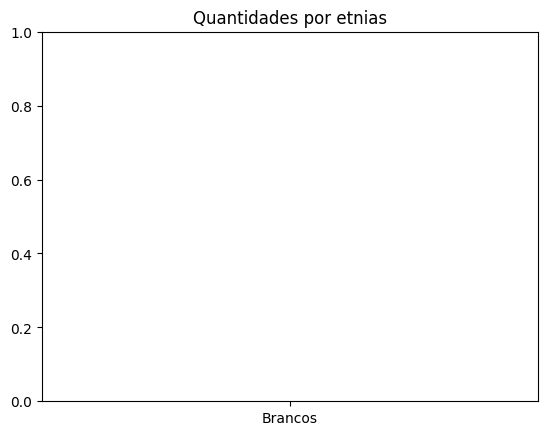

In [152]:
etnias = ['Brancos', 'Negros', 'Pardos', 'Indígenas']
quantidade = [181344, 7166, 48643, 417]

# Cores para as barras
cores = ['#ffc870', '#723422', '#f8872e', '#A52A2A']

plt.title('Quantidades por etnias')
plt.bar(etnias, quantidade, color=cores)
plt.xlabel('Etnia')
plt.ylabel('Quantidade')
plt.legend()
plt.grid(axis='y', color='black', linestyle='--')

# Mostrar os valores em cima das barras
for i, v in enumerate(quantidade):
    plt.text(i, v, str(v), ha='center', va='bottom')
plt.show()


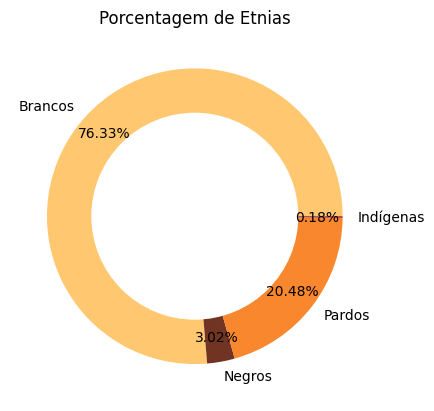

In [129]:
#Gerar o gráfico de pie
#"pctdistance=" serve para posicionar as porcentagens
plt.pie(quantidade, labels=etnias, autopct='%1.2f%%', pctdistance=0.83, colors=cores)

# Gerar um círculo no meio
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Porcentagem de Etnias')
plt.show()


Analises e gráficos de generos dos docentes em atividade

In [130]:
#inserindo as colunas em variáveis
feminino = planilha ['DOC_EX_FEMI']
masculino = planilha ['DOC_EX_MASC']

genero = feminino, masculino
print(genero)

genero = [feminino.tolist(), masculino.tolist()]
genero = pd.DataFrame({'Coluna feminina': feminino, 'Coluna masculina': masculino})
print(genero)

(0       29
1       41
2       80
3       18
4       20
        ..
2451     2
2452    11
2454     4
2455     4
2456     4
Name: DOC_EX_FEMI, Length: 2002, dtype: int64, 0       25
1       28
2       72
3       21
4       19
        ..
2451     4
2452     6
2454     7
2455     8
2456    12
Name: DOC_EX_MASC, Length: 2002, dtype: int64)
      Coluna feminina  Coluna masculina
0                  29                25
1                  41                28
2                  80                72
3                  18                21
4                  20                19
...               ...               ...
2451                2                 4
2452               11                 6
2454                4                 7
2455                4                 8
2456                4                12

[2002 rows x 2 columns]


In [131]:
#valor total das colunas
quantidades = genero.sum()

#formatação
quantidades = quantidades.apply(lambda x: f'{x:,}')
print(quantidades)

Coluna feminina     153,878
Coluna masculina    176,629
dtype: object


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


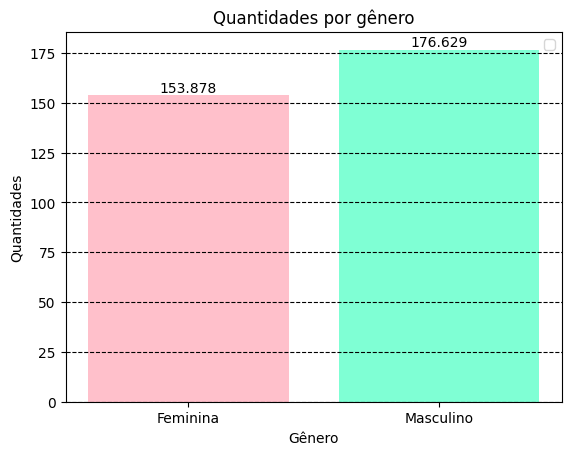

In [147]:
generos = ['Feminina', 'Masculino']
quantidades = [153.878, 176.629]  # Valores sem as casas decimais
cor = ['#FFC0CB', '#7FFFD4']

plt.title('Quantidades por gênero')
plt.bar(generos, quantidades, color=cor)
plt.xlabel('Gênero')
plt.ylabel('Quantidades')
plt.legend()
plt.grid(axis='y', color='black', linestyle='--')  # Apenas linhas horizontais

# Adicione os valores como rótulos nas barras
for i, v in enumerate(quantidades):
    plt.text(i, v, str(v), ha='center', va='bottom')
plt.show()

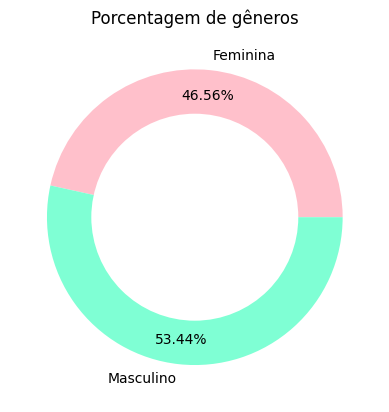

In [133]:
#Gerar o gráfico de pie
#"pctdistance=" serve para posicionar as porcentagens
genero = ['Feminina', 'Masculino']
quantidades = [153878, 176629]

plt.title('Porcentagem de gêneros')
plt.pie(quantidades, labels=genero, autopct='%1.2f%%', pctdistance=0.83, colors=cor)

# Gerar um círculo no meio
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()

Gerar e editar PDF

In [146]:
#Função para adicionar subtítulo com estilo
def add_subtitle(pdf, subtitle):
    pdf.set_font("Arial", style="B", size=14)
    pdf.cell(0, 18, subtitle, ln=True, align='c')

#Função para adicionar conteúdo com estilo
def add_content(pdf, content):
    pdf.set_font("Arial", size=13)
    pdf.multi_cell(0, 7, content, align='c', ln=True)

#Função para adicionar imagens
def add_images(pdf, image_paths):
    for image_path in image_paths:
        pdf.add_page()
        pdf.image(image_path, x=0, y=0, w=200)
#Criar um objeto PDF no formato retrato (P)
pdf = FPDF('P', 'mm', 'A4')
pdf.add_page()

#Adicionar o título principal
pdf.set_font("Arial", style="B", size=16)
pdf.cell(0, 15, "Cadastro IES 2020", align='C', ln=True)

add_subtitle(pdf, "Gráfico 1: Quantidade de docentes em atividade por etnia")
grafico_1 = (
    "Para o tema da atividade, li a documentação e o gráfico para selecionar quais tipos de dados e gráficos relevantes"
    " iria analisar, em seguida decidi relatar sobre a quantidade e porcentagem de pessoas ativas categorizadas por etnias."
    " Para isso, validei se no documento 'CADASTRO_IES_2020.CSV' olhando as informações e excluindo os valores nulos, fiz uma limpeza nos mesmos."
    " Coloquei os valores das colunas ['DOC_EX_BRANCA'], ['DOC_EX_PRETA'], ['DOC_EX_PARDA'], ['DOC_EX_INDÍGENA'] em variáveis"
    "das categorias brancos, negros, pardos e indígenas. Optei também por incluir em uma única chamada 'etnias' e com isso"
    "validei os valores de cada categoria das colunas citadas e importei para a variável 'quantidades' em seguida, gerei o gráfico de barras."
)
add_content(pdf, grafico_1)

add_subtitle(pdf, "Gráfico 2: Porcentagem de docentes em atividade por etnia" )
grafico_2 = (
    "Ao longo do processo, considerei a importância de mostrar a porcentagem de docentes ativos de cada etnia. "
    " Optei por criar um gráfico de pizza, pois é adequado para exibir porcentagens como iria trabalhar com apenas duas colunas,"
    "fiz o gráfico pizza."
)
add_content(pdf, grafico_2)

add_subtitle(pdf, "Gráfico 3: Quantidade de docentes em atividade por genero")
grafico_3 = (
    "Para incluir mais informações nos dados, decidi criar gráficos em relação aos gêneros sexuais. O processo foi mais simples,"
    "já que precisei de apenas duas colunas ['DOC_EX_FEMI'] e ['DOC_EX_MASC'] fiz o mesmo processo de colocar os valores das colunas"
    "nas variáveis assim gerei o gráfico de barras."
)
add_content(pdf, grafico_3)

add_subtitle(pdf, "Gráfico 4: Porcentagem de docentes em atividade por genero")
grafico_4 = (
  "Para criar o gráfico de pizza dos generos foi algo simples, ja que fiz o mesmo processo do gráfico 2,"
  "o diferencial é que usei apenas duas colunas ['DOC_EX_FEMI'] e ['DOC_EX_MASC']. "
)
add_content(pdf, grafico_4)

#adcionar imagens
image_paths = ['grafico1.png', 'grafico2.png', 'grafico3.png', 'grafico4.png']
add_images(pdf, image_paths)
pdf.output("Cadastro IES 2020.pdf")

print('PDF criado com sucesso!')


PDF criado com sucesso!


C:\Users\joaox\AppData\Local\Temp\ipykernel_12632\884726638.py:21: UserWarning: Substituting font arial by core font helvetica
  pdf.set_font("Arial", style="B", size=16)
C:\Users\joaox\AppData\Local\Temp\ipykernel_12632\884726638.py:22: DeprecationWarning: The parameter "ln" is deprecated. Instead of ln=True use new_x=XPos.LMARGIN, new_y=YPos.NEXT.
  pdf.cell(0, 15, "Cadastro IES 2020", align='C', ln=True)
C:\Users\joaox\AppData\Local\Temp\ipykernel_12632\884726638.py:3: UserWarning: Substituting font arial by core font helvetica
  pdf.set_font("Arial", style="B", size=14)
C:\Users\joaox\AppData\Local\Temp\ipykernel_12632\884726638.py:4: DeprecationWarning: The parameter "ln" is deprecated. Instead of ln=True use new_x=XPos.LMARGIN, new_y=YPos.NEXT.
  pdf.cell(0, 18, subtitle, ln=True, align='c')
C:\Users\joaox\AppData\Local\Temp\ipykernel_12632\884726638.py:8: UserWarning: Substituting font arial by core font helvetica
  pdf.set_font("Arial", size=13)
C:\Users\joaox\AppData\Local\Tem